In [32]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Create the Neural Network Model using nn.module

In [33]:
# Model to classify types of Irises
# there are 4 inputs and there are 3 outputs

class Model(nn.Module):
  def __init__(self, in_features = 4, h1=8, h2=9, out_features = 3):
    super().__init__()
    # Define the layers here
    self.fc1 = nn.Linear(in_features, h1) # Input layer to hidden layer 1
    self.fc2 = nn.Linear(h1, h2) # Hidden layer 1 to hidden layer 2
    self.out = nn.Linear(h2, out_features) # Hidden layer 2 to output layer


  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [34]:
torch.manual_seed(41)
model = Model()

# Data Preprocessing
Split the dataset, extract the features and normalize if needed, and convert the labels into tensors using LongTensor()

In [35]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
!pip install scikit-learn # install scikit-learn if you haven't already
from sklearn.preprocessing import StandardScaler # import the StandardScaler class

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
species_to_label = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y = [species_to_label[species] for species in y]

# Split data
from sklearn.model_selection import train_test_split # import train_test_split if you haven't already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
import torch # import torch if you haven't already
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [46]:
from sklearn.model_selection import train_test_split

Set the Loss Function and optimizer

In [47]:
#loss fucntion & optimizer
# Instantiate model, loss, and optimizer
torch.manual_seed(41)
model = Model(h1=10, h2=12)  # Adjusted hidden units
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # Adjusted learning rate



# Train the model

In [48]:
# Train our model!
# Training loop with early stopping
epochs = 200
losses = []
best_val_loss = float('inf')
patience = 10
epochs_without_improvement = 0

for i in range(epochs):
    # Training
    model.train()
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_test)
        val_loss = loss_function(y_val_pred, y_test)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {i + 1}")
            break

    print(f'epoch: {i + 1:2} loss: {loss.item():10.8f} val_loss: {val_loss.item():10.8f}')


epoch:  1 loss: 1.12680173 val_loss: 1.10168314
epoch:  2 loss: 1.11512780 val_loss: 1.09114814
epoch:  3 loss: 1.10404038 val_loss: 1.08103311
epoch:  4 loss: 1.09350455 val_loss: 1.07140529
epoch:  5 loss: 1.08333778 val_loss: 1.06195366
epoch:  6 loss: 1.07344675 val_loss: 1.05238569
epoch:  7 loss: 1.06360793 val_loss: 1.04253769
epoch:  8 loss: 1.05359995 val_loss: 1.03220141
epoch:  9 loss: 1.04316115 val_loss: 1.02126646
epoch: 10 loss: 1.03213561 val_loss: 1.00974333
epoch: 11 loss: 1.02045166 val_loss: 0.99750763
epoch: 12 loss: 1.00801146 val_loss: 0.98425609
epoch: 13 loss: 0.99467683 val_loss: 0.96984315
epoch: 14 loss: 0.98029602 val_loss: 0.95409274
epoch: 15 loss: 0.96476918 val_loss: 0.93692285
epoch: 16 loss: 0.94794631 val_loss: 0.91829646
epoch: 17 loss: 0.92970383 val_loss: 0.89846504
epoch: 18 loss: 0.91005635 val_loss: 0.87728626
epoch: 19 loss: 0.88901812 val_loss: 0.85477692
epoch: 20 loss: 0.86674690 val_loss: 0.83106452
epoch: 21 loss: 0.84340364 val_loss: 0.8

# Graph the losses per epoch

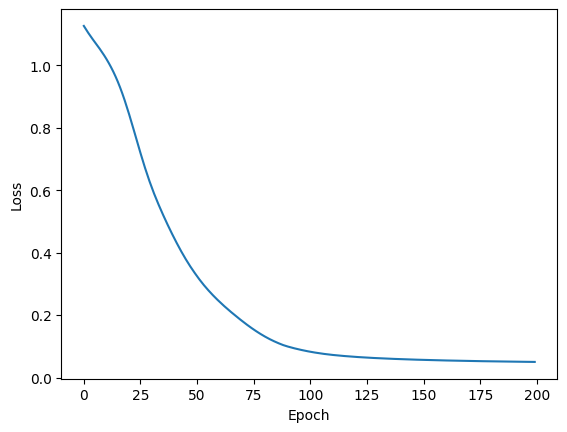

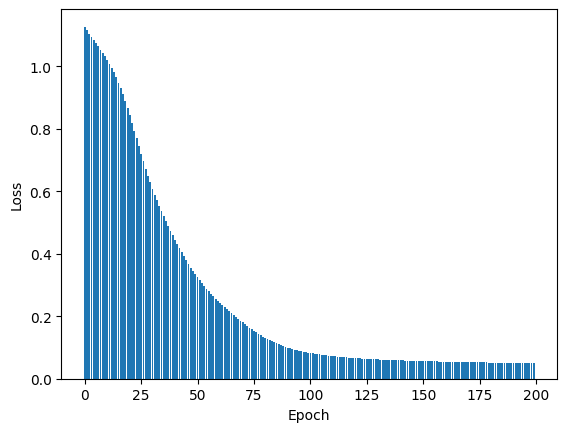

In [49]:
# Graph it out!

#line chart
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses]) # Convert loss tensors to NumPy arrays using detach().numpy()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#bar chart
plt.bar(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Test the model on the test set

In [53]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():
  # Convert X_test to a PyTorch Tensor
  X_test_tensor = torch.FloatTensor(X_test)
  y_eval = model.forward(X_test_tensor) # Pass the tensor to the model
  # Convert y_test to a PyTorch Tensor
  y_test_tensor = torch.LongTensor(y_test) # Convert y_test to a tensor
  loss = loss_function(y_eval, y_test_tensor) # Use the tensor for loss calculation

print(f'Loss: {loss}')

#accuracy
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    # Convert data to PyTorch Tensor before passing to model
    data_tensor = torch.FloatTensor(data)
    y_val = model.forward(data_tensor)  # Pass the tensor to the model
    print(f'{i+1:2}. {str(data_tensor.numpy()):28} {y_val.argmax().item()}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

#plotting accuracy
#plt.plot(range(epochs), [loss.detach().numpy() for loss in losses]) # Convert loss tensors to NumPy arrays using detach().numpy()
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#plt.show()


Loss: 0.031030742451548576
 1. [ 0.35451683 -0.5792584   0.5576453   0.02332414] 1
 2. [-0.1330708  1.6702887 -1.1625973 -1.1762028] 0
 3. [ 2.3048673 -1.0291678  1.8191565  1.4894127] 2
 4. [ 0.23261994 -0.35430366  0.44296247  0.42316645] 1
 5. [ 1.2077953  -0.5792584   0.6149867   0.28988567] 1
 6. [-0.4987615   0.77046984 -1.2772801  -1.042922  ] 0
 7. [-0.2549677  -0.35430366 -0.07311031  0.1566049 ] 1
 8. [1.3296921  0.09560575 0.78701097 1.4894127 ] 2
 9. [ 0.47641376 -1.9289865   0.44296247  0.42316645] 1
10. [-0.01117388 -0.80421305  0.09891395  0.02332414] 1
11. [0.8421045  0.32056046 0.78701097 1.0895703 ] 2
12. [-1.230143   -0.12934895 -1.3346215  -1.4427644 ] 0
13. [-0.3768646   0.99542457 -1.3919629  -1.3094835 ] 0
14. [-1.1082461   0.09560575 -1.2772801  -1.4427644 ] 0
15. [-0.86445224  1.6702887  -1.2772801  -1.1762028 ] 0
16. [0.59831065 0.5455152  0.5576453  0.5564472 ] 1
17. [ 0.8421045  -0.12934895  1.1884009   1.3561319 ] 2
18. [-0.2549677  -1.2541225   0.09891395 

In [51]:
correct = 0
total = len(y_test)

with torch.no_grad():
  for i, data in enumerate(X_test_tensor):  # X_test_tensor is already a tensor
    y_val = model(data)  # data is now tensor
    predicted = y_val.argmax().item()
    if predicted == y_test[i]:
      correct += 1

accuracy = (correct / total) * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 36.67%
